In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [121]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [122]:
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [123]:
df_vendas['mes_numero'] = range(1, 13)

In [127]:
df_vendas.drop(columns='mes', axis=1, inplace=True)

In [128]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   vendas      12 non-null     int64
 1   mes_numero  12 non-null     int64
dtypes: int64(2)
memory usage: 324.0 bytes


In [129]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [130]:
# Modelo
X = df_vendas.drop(columns=['vendas'])
y = df_vendas['vendas']

In [132]:
# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=51)

In [133]:
model = LinearRegression().fit(X_train, y_train)

In [134]:
# Gerar Predições do conjunto de teste com base no Modelo
y_pred = model.predict(X_test)

In [135]:
y_pred

array([2424.16666667, 2880.83333333, 2310.        ])

In [136]:
# R2 Score - Conjunto de Treinamento
model.score(X_train, y_train)

0.9899261603375528

In [137]:
# R2 Score - Conjunto de Teste
model.score(X_test, y_test)

0.966688988095238

In [138]:
# MAE (Mean absolute error)
mean_absolute_error(y_test, y_pred)

35.00000000000015

In [142]:
dezembro = X[X['mes_numero'] == 12]  # Dados para prever dezembro
vendas_dezembro = model.predict(dezembro)
vendas_dezembro

array([3337.5])

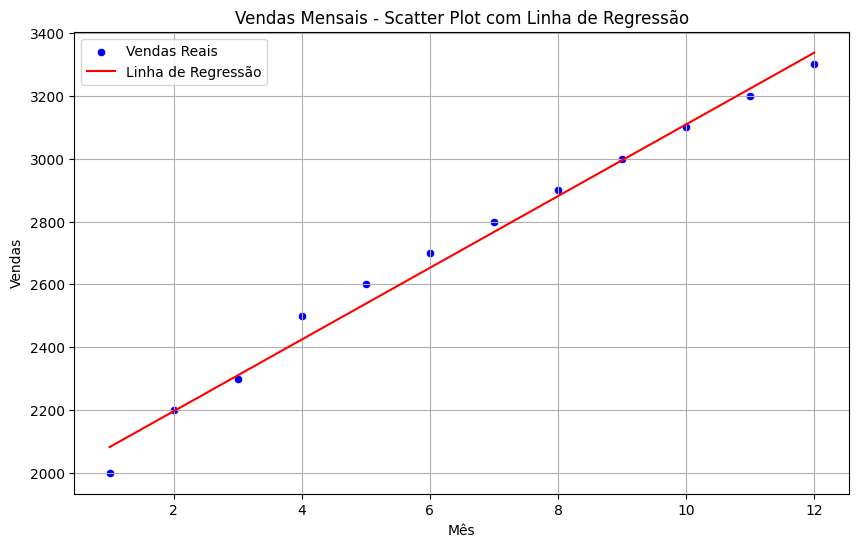

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas, label='Vendas Reais', color='blue')
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red', label='Linha de Regressão')
plt.title('Vendas Mensais - Scatter Plot com Linha de Regressão')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()

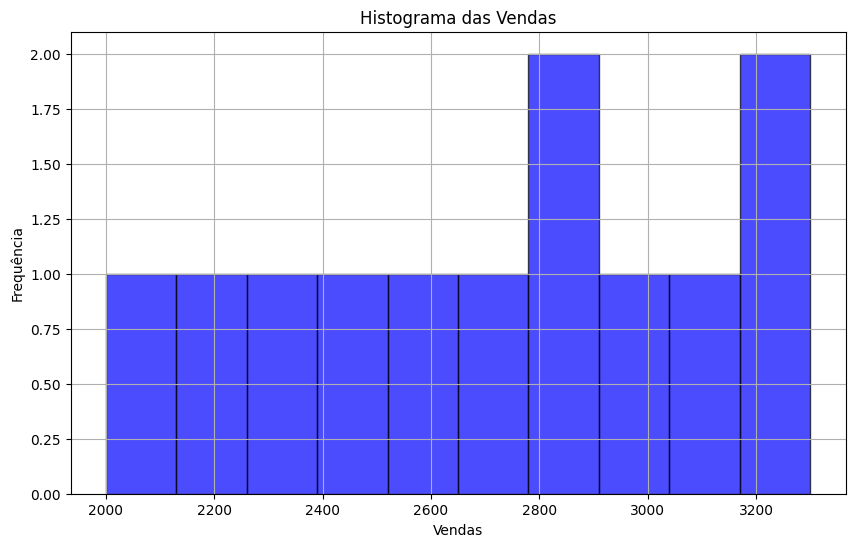

In [144]:
plt.figure(figsize=(10, 6))
plt.hist(df_vendas['vendas'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histograma das Vendas")
plt.xlabel("Vendas")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

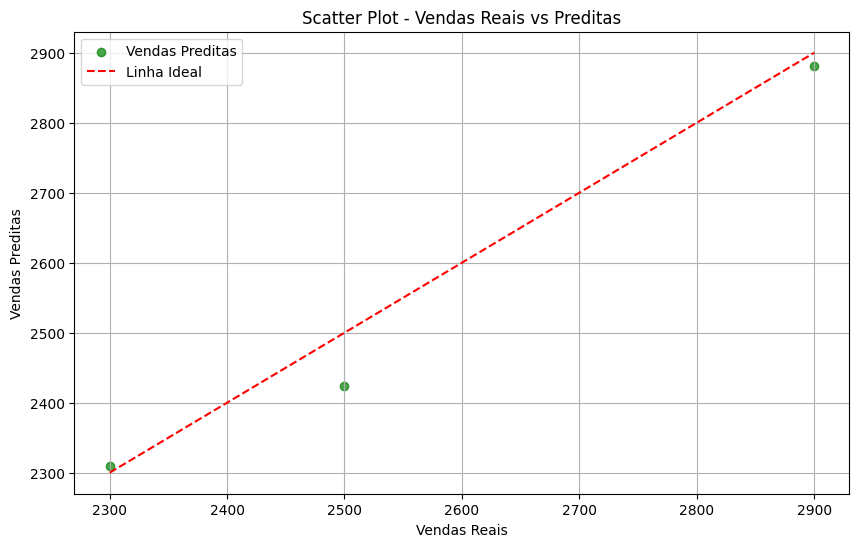

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Vendas Preditas')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha Ideal')
plt.title("Scatter Plot - Vendas Reais vs Preditas")
plt.xlabel("Vendas Reais")
plt.ylabel("Vendas Preditas")
plt.legend()
plt.grid(True)
plt.show()